In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [39]:
bias = 100
X = np.arange(1000).reshape(-1,1)
y_true = np.ravel(X.dot(0.3) + bias)
noise = np.random.normal(0, 60, 1000)

In [40]:
y = y_true+noise

In [27]:
lr_fi_true = LinearRegression(fit_intercept=True)
lr_fi_false = LinearRegression(fit_intercept=False)
lr_fi_true.fit(X, y)
lr_fi_false.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

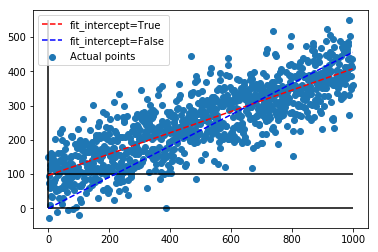

In [28]:
plt.scatter(X, y, label='Actual points')
lr_fi_true_yhat = np.dot(X, lr_fi_true.coef_) + lr_fi_true.intercept_
lr_fi_false_yhat = np.dot(X, lr_fi_false.coef_) + lr_fi_false.intercept_
plt.plot(X, lr_fi_true_yhat, 'r--', label='fit_intercept=True')
plt.plot(X, lr_fi_false_yhat, 'b--', label='fit_intercept=False')
plt.legend()
plt.vlines(0, 0, y.max())
plt.hlines(bias, X.min(), X.max())
plt.hlines(0, X.min(), X.max())
plt.show()

In [50]:
X_with_ones = np.hstack((np.ones((X.shape[0], 1)), X))
lr_fi_true_with_one = LinearRegression(fit_intercept=True)
lr_fi_false_with_one = LinearRegression(fit_intercept=False)
lr_fi_true_with_one.fit(X_with_ones, y)
lr_fi_false_with_one.fit(X_with_ones, y)

array([103.27138121,   0.29522217])

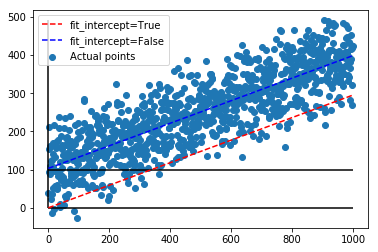

103.27138120581955 [0.         0.29522217]
0.0 [103.27138121   0.29522217]


In [55]:
plt.scatter(X, y, label='Actual points')
lr_fi_true_yhat_with_one = np.dot(X_with_ones, lr_fi_true_with_one.coef_.T)
lr_fi_false_yhat_with_one = np.dot(X_with_ones, lr_fi_false_with_one.coef_.T)
plt.plot(X, lr_fi_true_yhat_with_one, 'r--', label='fit_intercept=True')
plt.plot(X, lr_fi_false_yhat_with_one, 'b--', label='fit_intercept=False')
plt.legend()
plt.vlines(0, 0, y.max())
plt.hlines(bias, X.min(), X.max())
plt.hlines(0, X.min(), X.max())
plt.show()
print(lr_fi_true_with_one.intercept_, lr_fi_true_with_one.coef_)
print(lr_fi_false_with_one.intercept_, lr_fi_false_with_one.coef_)

In [56]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 1, 1])
skf = StratifiedKFold(n_splits=2)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [1 3] TEST: [0 2]
TRAIN: [0 2] TEST: [1 3]
